In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from catboost import CatBoostRegressor
from sklearn.impute import IterativeImputer
from stacked_models import stacked_model_reg
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.linear_model import ElasticNetCV, LogisticRegression, LogisticRegressionCV

kf = KFold(n_splits=5, shuffle=True, random_state=1)

plt.style.use('ggplot')

In [250]:
df = pd.read_csv('/../../train.csv')
df.head()

galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  ...  \
0                                    NaN              NaN  ...   
1                               0.833624         0.467873  ...   
2                               0.469110         0.363837  ...   
3                                    NaN              NaN  ...   
4                               0.910341         0.918353  ...   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Intergalactic Development Index (IDI), male  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Gender Development Index (GDI)  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

   Intergalactic Development Index (IDI), female, Rank  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                                NaN                    NaN   
1                                                NaN              19.177926   
2                                                NaN              21.151265   
3                                                NaN                    NaN   
4                                                NaN                    NaN   

   Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total  \
0                                                NaN                           
1                                                NaN                           
2                                           6.534020                           
3                                           5.912194                           
4                                  

In [251]:
df_test = pd.read_csv('/../../test.csv')
df_test.tail()

galactic year                galaxy  existence expectancy index  \
885        1016064  ESO 383-087 (ISG 39)                         NaN   
886        1016064               NGC 247                         NaN   
887        1016064            ESO 325-11                         NaN   
888        1016064           ESO 540-032                         NaN   
889        1016064               KK98 77                         NaN   

     existence expectancy at birth  Gross income per capita  Income Index  \
885                            NaN                      NaN           NaN   
886                            NaN                      NaN           NaN   
887                            NaN                      NaN           NaN   
888                            NaN                      NaN           NaN   
889                            NaN                      NaN           NaN   

     Expected years of education (galactic years)  \
885                                           NaN   
886                                           NaN   
887                                           NaN   
888                                           NaN   
889                                           NaN   

     Mean years of education (galactic years)  \
885                                       NaN   
886                                       NaN   
887                                       NaN   
888                                       NaN   
889                                       NaN   

     Intergalactic Development Index (IDI)  Education Index  ...  \
885                                    NaN              NaN  ...   
886                                    NaN              NaN  ...   
887                                    NaN              NaN  ...   
888                                    NaN              NaN  ...   
889                                    NaN              NaN  ...   

     Current health expenditure (% of GGP)  \
885                                    NaN   
886                                    NaN   
887                                    NaN   
888                                    NaN   
889                                    NaN   

     Intergalactic Development Index (IDI), female  \
885                                            NaN   
886                                            NaN   
887                                            NaN   
888                                            NaN   
889                                            NaN   

     Intergalactic Development Index (IDI), male  \
885                                          NaN   
886                                          NaN   
887                                          NaN   
888                                          NaN   
889                                          NaN   

     Gender Development Index (GDI)  \
885                             NaN   
886                             NaN   
887                             NaN   
888                             NaN   
889                             NaN   

     Intergalactic Development Index (IDI), female, Rank  \
885                                                NaN     
886                                                NaN     
887                                                NaN     
888                                                NaN     
889                                                NaN     

     Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
885                                                NaN                    NaN   
886                                                NaN                    NaN   
887                                                NaN                    NaN   
888                                                NaN                    NaN   
889                                                NaN                    NaN   

     Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total  \
885   

### EDA

Checking for any observable difference between the correlation plots of the original dataframe vs the imputed dataframe 

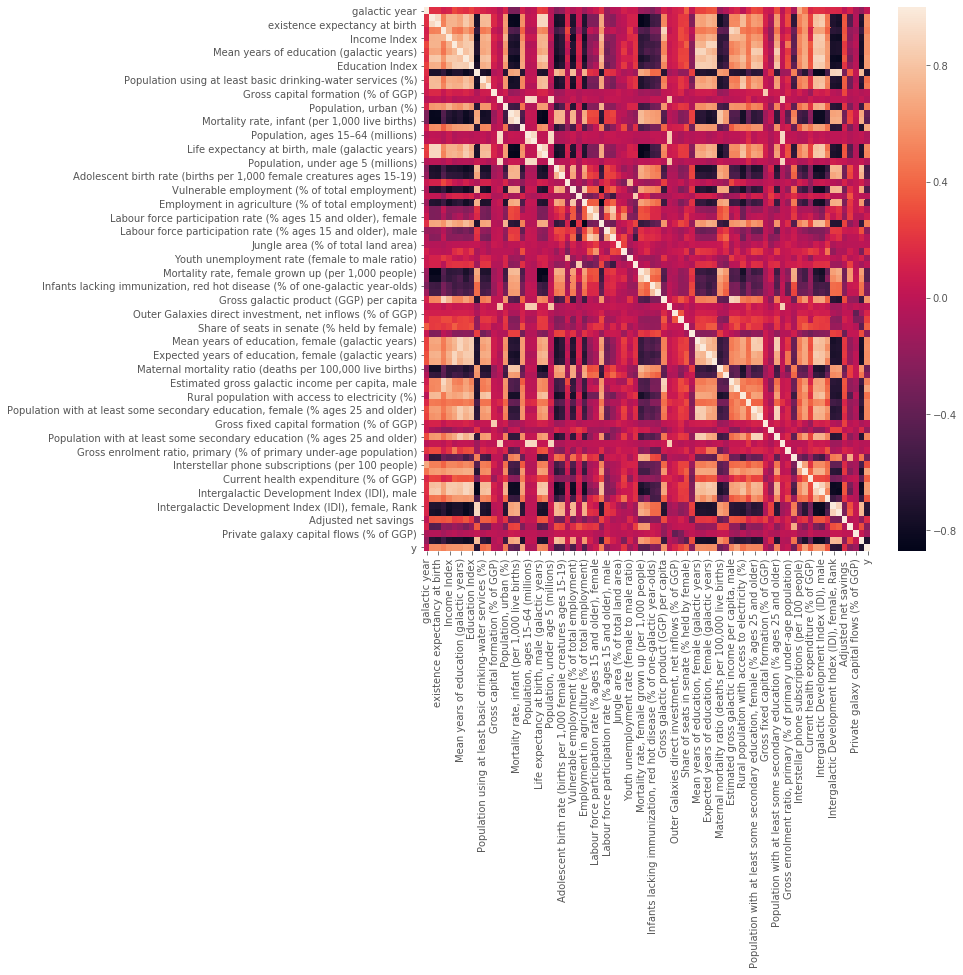

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

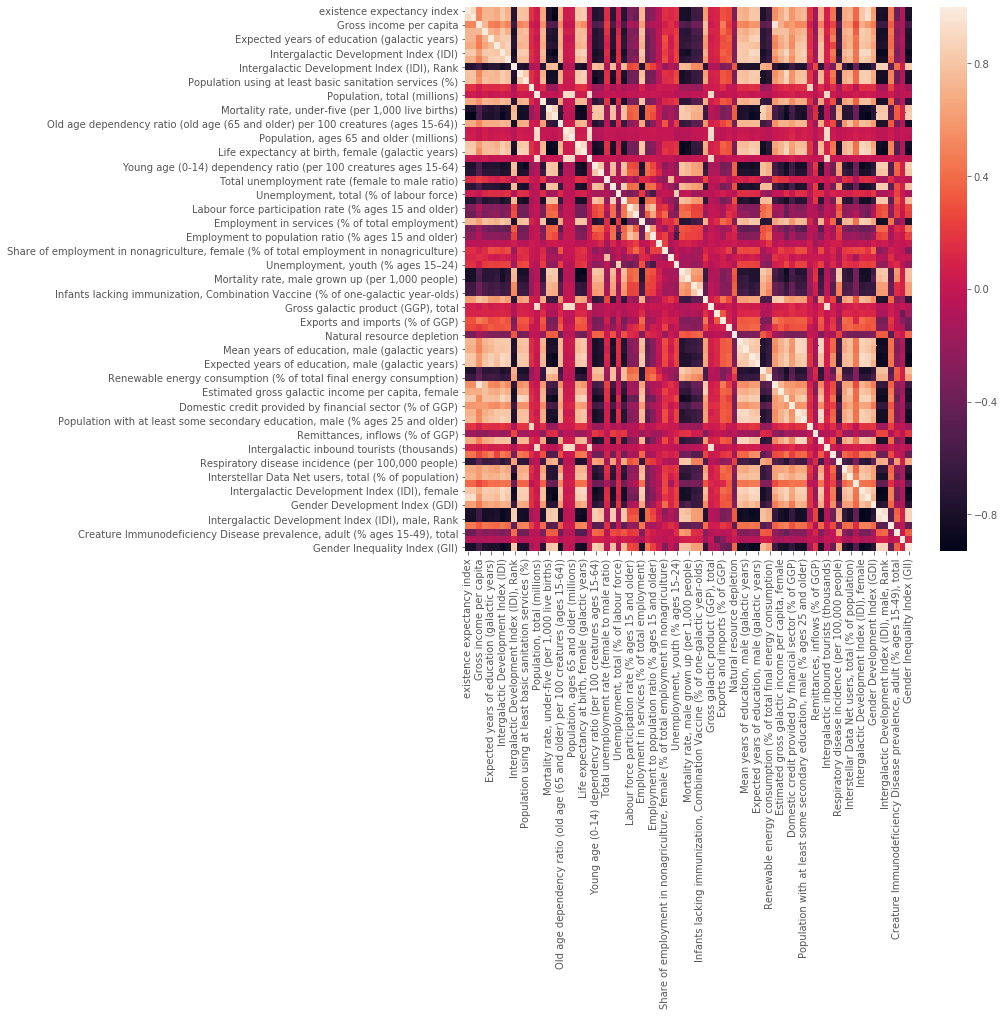

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df_impt.corr())

Visualising the distributions of the multiple features

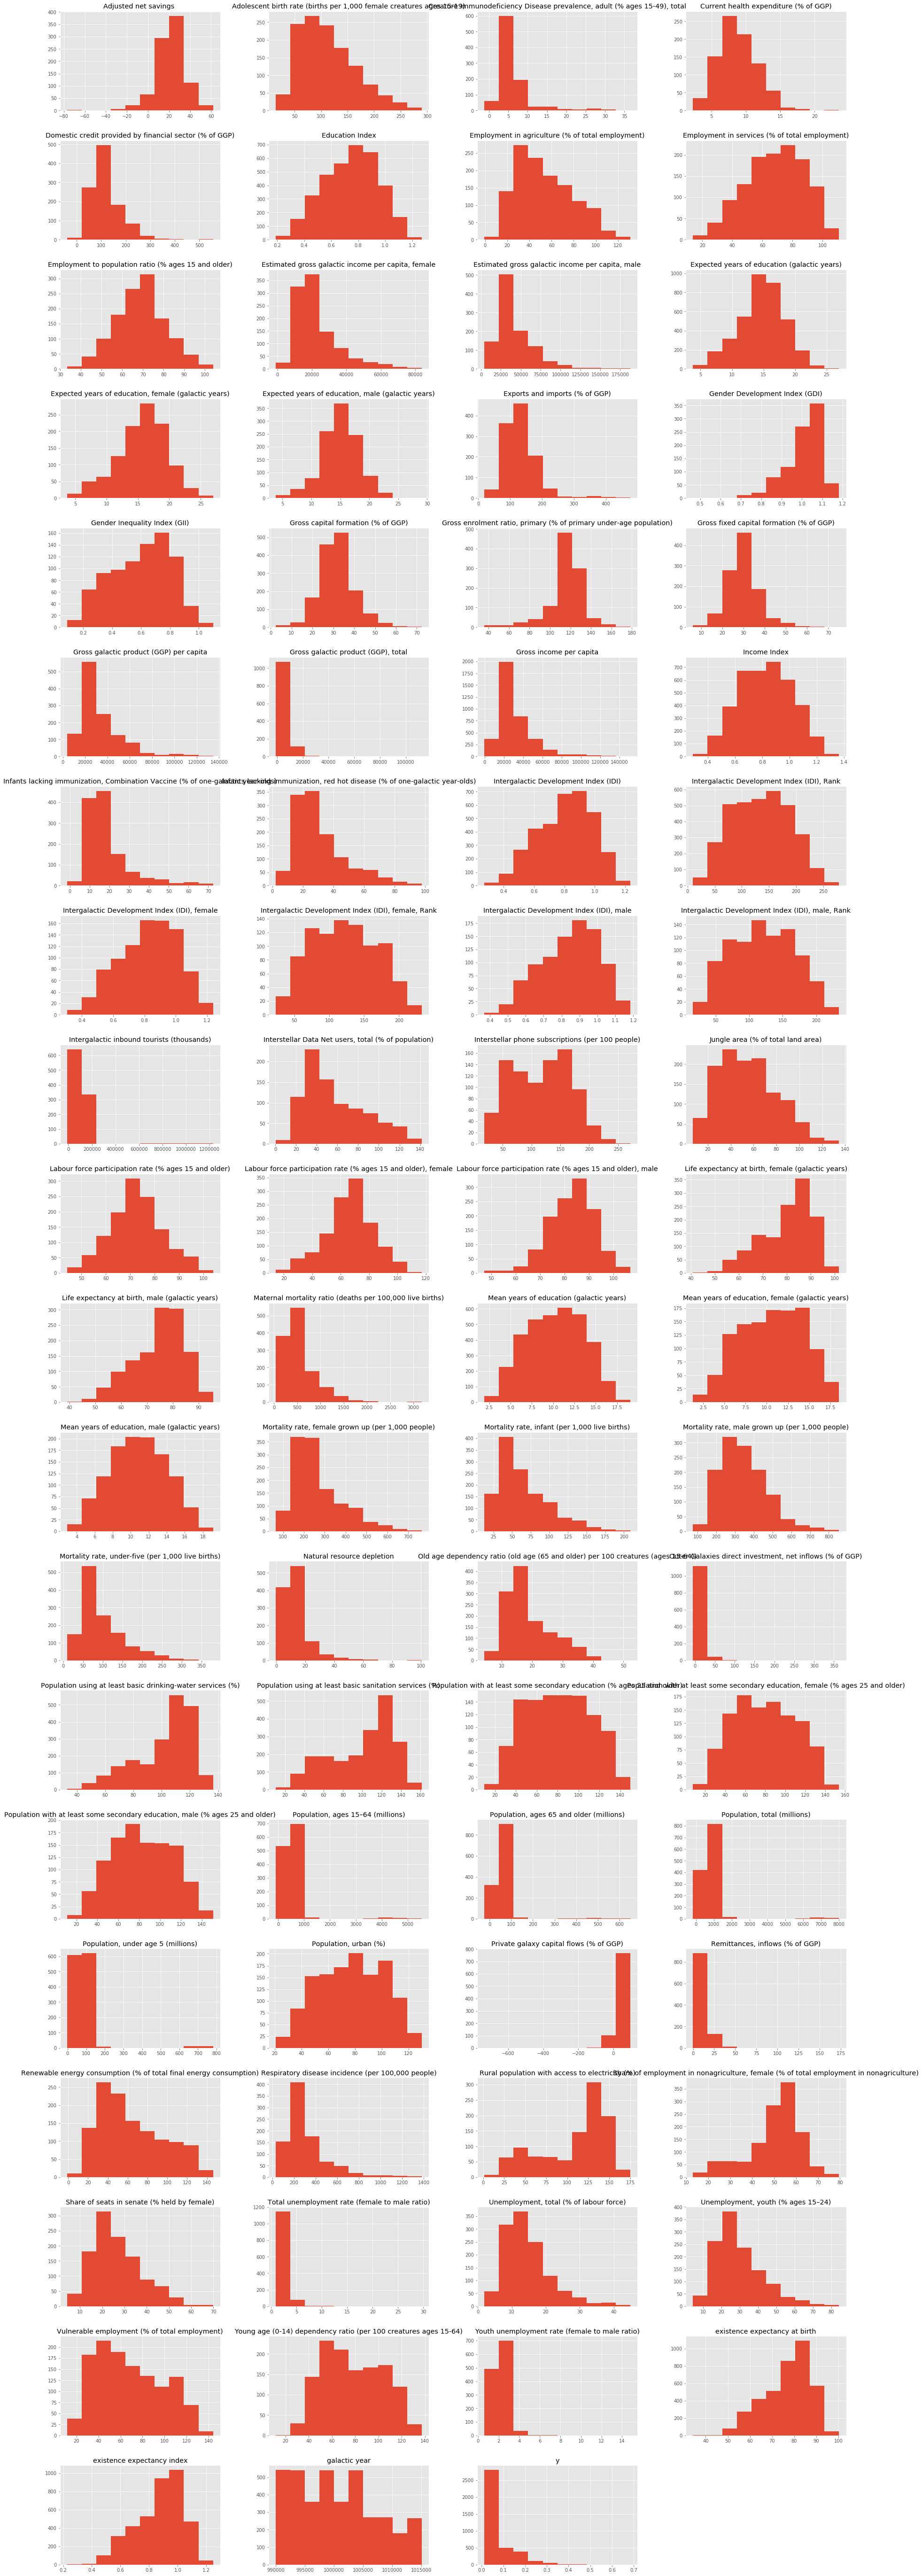

In [285]:
df.hist(figsize=(30,100), layout=(20,4))
plt.show()

### Corr functions

One of the main tasks was deciding what to do with the null values in the dataframe of which there were quite a few. We ultimately ended up using the experimental Imputer class by scikit-learn but before that we came up with a few rules on how to deal with the null values. 

- We first dropped all of the columns that had a correlation coefficient lower than 0.4 to y
- We then wrote a function to determine what percentage of nulls the remaining columns had, the correlation to y and the columns to which each columns was most correlated to. The thinking behind this was try to get an idea of how all the columns fit together and see which columns we could use to fill the gaps for others. 
- We also decided to drop any columns containing the words 'male' or 'female' as of all of the information captured by those columns was already represented in the corresponding gender aggregate column. 

In the end, we ended taking another approach by using the scikit-learn class Imputer.

In [286]:
def calculate_corr_df(df):
    """Function that determine what percentage of nulls columns in the dataframe have, the correlation 
    to the target variable, and the column that each column is most highly correlated to
    """
    
    corr_list = []
    for col in df.columns[2:-1]:
        
        nulls = df[col].isnull().sum()
        nulls_per = nulls/3865
        corr_to_y = df.corr()['y'][col]
        abs_corr_to_y = abs(corr_to_y)
        corr = df.corr()[col].sort_values(ascending=False)[1]
        corr_index = df.corr()[col].sort_values(ascending=False).index[1]

        corr_list.append((col, nulls, nulls_per, corr_to_y,
                         abs_corr_to_y, corr, corr_index))

    return pd.DataFrame(corr_list, columns= 
                           ['col_name', 'nulls', 'nulls_per', 'corr_to_y', 'abs_corr_to_y', 
                            'highest_corr', 'highest_corr_col'])
    

In [9]:
# Dropping all of the columns below 0.40 abs correlation to y
corr_df = calculate_corr_df(df)
cols_below_min_corr = list(corr_df[corr_df.abs_corr_to_y < 0.40].sort_values(
    by=['abs_corr_to_y', 'nulls_per'], ascending=[True, False]).col_name)
cols_below_min_corr

['Unemployment, youth (% ages 15–24)',
 'Gross galactic product (GGP), total',
 'Gross capital formation (% of GGP)',
 'Gross fixed capital formation (% of GGP)',
 'Jungle area (% of total land area)',
 'Gross enrolment ratio, primary (% of primary under-age population)',
 'Unemployment, total (% of labour force)',
 'Intergalactic inbound tourists (thousands)',
 'Employment to population ratio (% ages 15 and older)',
 'Labour force participation rate (% ages 15 and older)',
 'Population, ages 65 and older (millions)',
 'Population, total (millions)',
 'Population, ages 15–64 (millions)',
 'Labour force participation rate (% ages 15 and older), female',
 'Population, under age 5 (millions)',
 'Total unemployment rate (female to male ratio)',
 'Private galaxy capital flows (% of GGP)',
 'Outer Galaxies direct investment, net inflows (% of GGP)',
 'Youth unemployment rate (female to male ratio)',
 'Adjusted net savings ',
 'Remittances, inflows (% of GGP)',
 'Share of employment in nonagr

In [10]:
len(cols_below_min_corr)

36

In [11]:
df.drop(columns = cols_below_min_corr, inplace=True)
df

galactic year                        galaxy  existence expectancy index  \
0            990025  Large Magellanic Cloud (LMC)                    0.628657   
1            990025              Camelopardalis B                    0.818082   
2            990025                       Virgo I                    0.659443   
3            990025            UGC 8651 (DDO 181)                    0.555862   
4            990025                  Tucana Dwarf                    0.991196   
...             ...                           ...                         ...   
3860        1015056                     Columba I                    1.029704   
3861        1015056  Leo II Dwarf (Leo B, DDO 93)                    0.937869   
3862        1015056        Canes Venatici I Dwarf                    1.036144   
3863        1015056                         KKs 3                    0.939034   
3864        1015056                      NGC 5237                    1.032244   

      existence expectancy at birth  Gross income per capita  Income Index  \
0                         63.125200             27109.234310      0.646039   
1                         81.004994             30166.793958      0.852246   
2                         59.570534              8441.707353      0.499762   
3                         52.333293                      NaN           NaN   
4                         81.802464             81033.956906      1.131163   
...                             ...                      ...           ...   
3860                      82.832063             34310.471408      0.855094   
3861                      75.877098             36899.067719      0.929494   
3862                      93.540275             37002.977875      1.085245   
3863                      78.274427             28180.459770      0.687655   
3864                      91.641356             73109.215949      1.207746   

      Expected years of education (galactic years)  \
0                                         8.240543   
1                                        10.671823   
2                                         8.840316   
3                                              NaN   
4                                        13.800672   
...                                            ...   
3860                                     18.578586   
3861                                     16.153857   
3862                                     21.066473   
3863                                      9.388911   
3864                                     18.910920   

      Mean years of education (galactic years)  \
0                                          NaN   
1                                     4.742470   
2                                     5.583973   
3                                          NaN   
4                                    13.188907   
...                                        ...   
3860                                 10.557143   
3861                                  9.151665   
3862                                 16.661344   
3863                                  8.908748   
3864                                 16.202486   

      Intergalactic Development Index (IDI)  Education Index  ...  \
0                                       NaN              NaN  ...   
1                                  0.833624         0.467873  ...   
2                                  0.469110         0.363837  ...   
3                                       NaN              NaN  ...   
4                                  0.910341         0.918353  ...   
...                                     ...              ...  ...   
3860                               0.906573         0.862826  ...   
3861                               0.865822         0.747577  ...   
3862                               0.983835         1.100779  ...   
3863                               0.735694         0.602703  ...   
3864                               1.171634         1.085080  ...   

      Population 

In [17]:
#Using our function to get better sense of the columns
corr_df = calculate_corr_df(df)

In [20]:
#Dropping all of the columns containing the words 'male' or 'female'
cols_male_female = list(corr_df[new_corr_df.col_name.str.contains('female|male' , regex=True)].col_name)
cols_male_female

['Life expectancy at birth, male (galactic years)',
 'Life expectancy at birth, female (galactic years)',
 'Adolescent birth rate (births per 1,000 female creatures ages 15-19)',
 'Mortality rate, female grown up (per 1,000 people)',
 'Mortality rate, male grown up (per 1,000 people)',
 'Mean years of education, female (galactic years)',
 'Mean years of education, male (galactic years)',
 'Expected years of education, female (galactic years)',
 'Expected years of education, male (galactic years)',
 'Estimated gross galactic income per capita, male',
 'Estimated gross galactic income per capita, female',
 'Population with at least some secondary education, female (% ages 25 and older)',
 'Population with at least some secondary education, male (% ages 25 and older)',
 'Intergalactic Development Index (IDI), female',
 'Intergalactic Development Index (IDI), male',
 'Intergalactic Development Index (IDI), female, Rank',
 'Intergalactic Development Index (IDI), male, Rank']

In [21]:
df.drop(columns = cols_male_female, inplace=True)
df

galactic year                        galaxy  existence expectancy index  \
0            990025  Large Magellanic Cloud (LMC)                    0.628657   
1            990025              Camelopardalis B                    0.818082   
2            990025                       Virgo I                    0.659443   
3            990025            UGC 8651 (DDO 181)                    0.555862   
4            990025                  Tucana Dwarf                    0.991196   
...             ...                           ...                         ...   
3860        1015056                     Columba I                    1.029704   
3861        1015056  Leo II Dwarf (Leo B, DDO 93)                    0.937869   
3862        1015056        Canes Venatici I Dwarf                    1.036144   
3863        1015056                         KKs 3                    0.939034   
3864        1015056                      NGC 5237                    1.032244   

      existence expectancy at birth  Gross income per capita  Income Index  \
0                         63.125200             27109.234310      0.646039   
1                         81.004994             30166.793958      0.852246   
2                         59.570534              8441.707353      0.499762   
3                         52.333293                      NaN           NaN   
4                         81.802464             81033.956906      1.131163   
...                             ...                      ...           ...   
3860                      82.832063             34310.471408      0.855094   
3861                      75.877098             36899.067719      0.929494   
3862                      93.540275             37002.977875      1.085245   
3863                      78.274427             28180.459770      0.687655   
3864                      91.641356             73109.215949      1.207746   

      Expected years of education (galactic years)  \
0                                         8.240543   
1                                        10.671823   
2                                         8.840316   
3                                              NaN   
4                                        13.800672   
...                                            ...   
3860                                     18.578586   
3861                                     16.153857   
3862                                     21.066473   
3863                                      9.388911   
3864                                     18.910920   

      Mean years of education (galactic years)  \
0                                          NaN   
1                                     4.742470   
2                                     5.583973   
3                                          NaN   
4                                    13.188907   
...                                        ...   
3860                                 10.557143   
3861                                  9.151665   
3862                                 16.661344   
3863                                  8.908748   
3864                                 16.202486   

      Intergalactic Development Index (IDI)  Education Index  ...  \
0                                       NaN              NaN  ...   
1                                  0.833624         0.467873  ...   
2                                  0.469110         0.363837  ...   
3                                       NaN              NaN  ...   
4                                  0.910341         0.918353  ...   
...                                     ...              ...  ...   
3860                               0.906573         0.862826  ...   
3861                               0.865822         0.747577  ...   
3862                               0.983835         1.100779  ...   
3863                               0.735694         0.602703  ...   
3864                               1.171634         1.085080  ...   

      Vulnerable 

In [22]:
corr_df = calculate_corr_df(df)
corr_df

col_name  nulls  nulls_per  \
0                          existence expectancy index      1   0.000259   
1                       existence expectancy at birth      1   0.000259   
2                             Gross income per capita     28   0.007245   
3                                        Income Index     28   0.007245   
4        Expected years of education (galactic years)    133   0.034411   
5            Mean years of education (galactic years)    363   0.093920   
6               Intergalactic Development Index (IDI)    391   0.101164   
7                                     Education Index    391   0.101164   
8         Intergalactic Development Index (IDI), Rank    433   0.112031   
9   Population using at least basic drinking-water...   1844   0.477102   
10  Population using at least basic sanitation ser...   1850   0.478655   
11                              Population, urban (%)   2594   0.671151   
12     Mortality rate, infant (per 1,000 live births)   2606   0.674256   
13  Old age dependency ratio (old age (65 and olde...   2601   0.672962   
14  Young age (0-14) dependency ratio (per 100 cre...   2601   0.672962   
15      Vulnerable employment (% of total employment)   2628   0.679948   
16  Employment in agriculture (% of total employment)   2628   0.679948   
17     Employment in services (% of total employment)   2628   0.679948   
18            Gross galactic product (GGP) per capita   2663   0.689004   
19    Rural population with access to electricity (%)   2836   0.733765   
20  Domestic credit provided by financial sector (...   2786   0.720828   
21  Population with at least some secondary educat...   2814   0.728072   
22  Interstellar Data Net users, total (% of popul...   2993   0.774386   
23                      Gender Inequality Index (GII)   3021   0.781630   

    corr_to_y  abs_corr_to_y  highest_corr  \
0    0.547397       0.547397      0.906977   
1    0.555757       0.555757      0.906977   
2    0.508029       0.508029      0.888550   
3    0.579969       0.579969      0.831459   
4    0.584069       0.584069      0.853470   
5    0.583858       0.583858      0.867641   
6    0.625114       0.625114      0.846585   
7    0.613938       0.613938      0.867641   
8   -0.681592       0.681592      0.772487   
9    0.429087       0.429087      0.793460   
10   0.480033       0.480033      0.831948   
11   0.477494       0.477494      0.724393   
12  -0.434110       0.434110      0.726595   
13   0.679981       0.679981      0.679981   
14  -0.533741       0.533741      0.773663   
15  -0.496568       0.496568      0.819329   
16  -0.473959       0.473959      0.819329   
17   0.492594       0.492594      0.762034   
18   0.576339       0.576339      0.888550   
19   0.439887       0.439887      0.831948   
20   0.533294       0.533294      0.610193   
21   0.517712       0.517712      0.851509   
22   0.651823       0.651823      0.701372   
23  -0.722279       0.722279      0.773663   

                                     highest_corr_col  
0                       existence expectancy at birth  
1                          existence expectancy index  
2             Gross galactic product (GGP) per capita  
3               Intergalactic Development Index (IDI)  
4                                     Education Index  
5                                     Education Index  
6                                     Education Index  
7            Mean years of education (galactic years)  
8                       Gender Inequality Index (GII)  
9     Rural population with access to electricity (%)  
10    Rural population with access to electricity (%)  
11     Employment in services (% of total employment)  
12      Vulnerable employment (% of total employment)  
13                                                  y  
14                      Gender Inequality Index (GII)  
15  Employment in agriculture (% of total employment)  
16      Vulnerable employment (% of total employment)  
17        

In [26]:
df[df['existence expectancy index'].isnull()]

galactic year    galaxy  existence expectancy index  \
144         990025  NGC 5253                         NaN   

     existence expectancy at birth  Gross income per capita  Income Index  \
144                            NaN             20429.375702      0.633556   

     Expected years of education (galactic years)  \
144                                           NaN   

     Mean years of education (galactic years)  \
144                                       NaN   

     Intergalactic Development Index (IDI)  Education Index  ...  \
144                                    NaN              NaN  ...   

     Vulnerable employment (% of total employment)  \
144                                            NaN   

     Employment in agriculture (% of total employment)  \
144                                                NaN   

     Employment in services (% of total employment)  \
144                                             NaN   

     Gross galactic product (GGP) per capita  \
144                             19798.178503   

     Rural population with access to electricity (%)  \
144                                              NaN   

     Domestic credit provided by financial sector (% of GGP)  \
144                                                NaN         

     Population with at least some secondary education (% ages 25 and older)  \
144                                                NaN                         

     Interstellar Data Net users, total (% of population)  \
144                                                NaN      

     Gender Inequality Index (GII)         y  
144                            NaN  0.045115  

[1 rows x 27 columns]

### Imputer

As mentioned before we decided to go with the experimental scikit-learn Imputer class. At first we fed the dataframe as it was, with all of the nulls, but we noticed that for some of the rows where around 90% of the columms were null, the Imputer class filled those rows with the same values. Therefore, we wrote a function to forward fill and back fill some of the values for such rows before putting into the Imputer class for more accurate values. 

The function sorted by galactic year and grouped the dataframe by galaxies. It then first forward fills (as it made more sense to estimate the future from the past) and then back fills any remaining nulls (e.g. if certain galaxies only have the last galactic year information). This is only done for the rows where more then 85% of the columns are null as for the rest we let the Imputer class take over since this class is able to more intelligently fill in the values where there is some information.



In [122]:
#Defining the Imputer class
bayesianridge = linear_model.BayesianRidge()
imputer = IterativeImputer(estimator = bayesianridge, random_state=0, n_nearest_features=5, max_iter=1000, verbose = 1)

In [287]:
def fill_then_interp(df,imputer, test=False):
    """This function forward fills and back fills null values in rows where more 85% of the columns have null values, 
    after sorting my galactic year and grouped by galaxy. It then utilised the Imputer class to take care of the 
    null values in the rest of the rows. 
    """
    
    #get counter for non nulls
    df['non_null']=df.apply(lambda x: x.count(), axis=1)
    df['non_null']=df['non_null']/len(df.columns)*100
    
    #reset index so we know original positions of rows
    df=df.reset_index()
    
    #sorting by year
    df=df.sort_values(by='galactic year')
    
    #create new df that has bfill and ffill values
    df_filled=df.groupby('galaxy').apply(lambda x : x.ffill().bfill())
    
    #impose the filled df onto original when fufills condition
    df=df_filled.mask(df['non_null']>15,df)
    
    #sorts back to original positions
    df.sort_values(by='index',inplace=True)
    
    #impute the rest
    if not test: 
        print('Train set')
        df_impt = imputer.fit_transform(df.iloc[:, 3:-2])
    else: 
        print('Test set')
        df_impt = imputer.fit_transform(df.iloc[:, 3:-1])
    
    return df_impt


Imputing and saving the train set in to a csv

In [123]:
df_impt= fill_then_interp(df,imputer)

[IterativeImputer] Completing matrix with shape (3865, 77)
[IterativeImputer] Change: 670693.8418482289, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 137785.69713001224, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 139397.48798751037, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 136549.61904203444, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 137398.696516433, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 79961.19230930098, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 143890.08954696864, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 75175.53191202895, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 116316.25433319267, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 119315.42897097107, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 154758.0467603847, scaled tolerance: 1228.8430681437787 
[IterativeIm

[IterativeImputer] Change: 76197.2565957275, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 42224.7903987398, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 66120.35379891278, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 70320.96643924975, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 105756.10224800132, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 76844.23406437467, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 189787.3198924327, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 141533.14900943596, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 90938.41434840062, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 66166.86089112528, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 94553.97673299453, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 103358.44948635323, scaled tolerance: 1228.843068

[IterativeImputer] Change: 139837.93072360868, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 139321.31963939086, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 105957.12776795162, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 239940.91323898282, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 87749.00968069134, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 140749.81936136936, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 139501.297755715, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 145449.59481280317, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 133111.18935039168, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 133208.32546198487, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 159244.42628784737, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 131136.06627222235, scaled tolerance: 122

[IterativeImputer] Change: 160969.62701677118, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 181537.14792766338, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 161512.32555916702, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 115963.26674790177, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 169144.73656687656, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 140131.67425489653, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 111135.84356874361, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 135089.89779973094, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 113689.2391783021, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 90530.57342673103, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 39885.3985792762, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 102910.54239103178, scaled tolerance: 1228

[IterativeImputer] Change: 139131.51513463855, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 121094.93282411569, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 115357.25650445906, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 112496.03044382752, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 610794.3160248077, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 676551.7605128207, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 101053.79587421993, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 105167.98033467542, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 168998.29521420764, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 105543.42638027313, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 54706.961193190305, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 87793.75942843014, scaled tolerance: 122

[IterativeImputer] Change: 133888.51993787996, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 147426.30144830226, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 198706.82624132762, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 102646.19292199542, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 107828.21968270522, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 79796.88603233128, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 87166.00514817068, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 193140.31470540055, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 111860.01923773222, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 183565.59723548297, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 119991.79602229931, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 63290.91374670844, scaled tolerance: 122

[IterativeImputer] Change: 166058.38883717786, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 105135.05076163368, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 69940.13294487272, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 139248.69478230958, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 182313.72076532137, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 107122.1211935489, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 63257.83994739678, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 94351.04057966362, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 120581.22828824898, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 137921.0286750764, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 115912.66042119866, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 104753.87157675385, scaled tolerance: 1228.

[IterativeImputer] Change: 189683.3879703486, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 154883.2344400463, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 147494.73863777667, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 153317.93714814816, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 136785.56645439478, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 83352.69379925015, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 100471.04536654665, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 113977.1977602391, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 164385.7975348574, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 145166.53647270883, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 112436.10439546159, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 106015.42646049708, scaled tolerance: 1228.

[IterativeImputer] Change: 123179.17907427948, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 171419.14931652235, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 117674.06607635018, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 700913.358368372, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 570188.0242882461, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 110545.857528743, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 130152.00045071203, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 148901.76853346406, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 141427.83977865067, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 118936.2811761479, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 90386.48085408716, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 174464.4164960785, scaled tolerance: 1228.843

[IterativeImputer] Change: 113619.07649105033, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 158265.23492369038, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 192960.5931281201, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 156282.2948044152, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 178554.9822152067, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 114556.4955365033, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 86274.02305752566, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 108773.66636561614, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 147592.3990907317, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 93437.66928033858, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 120188.25846112912, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 141414.37013920193, scaled tolerance: 1228.84

[IterativeImputer] Change: 109483.5785500567, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 83992.86672938656, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 232826.7121555263, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 124427.67359028687, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 142908.15726758467, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 78072.32317010817, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 219256.425101652, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 102282.67137255306, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 237751.13339783088, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 198868.30347810924, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 77534.8443027759, scaled tolerance: 1228.8430681437787 
[IterativeImputer] Change: 89112.67699941991, scaled tolerance: 1228.8430

/opt/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [128]:
df_impt.shape

(3865, 77)

In [168]:
df_impt= pd.DataFrame(df_impt, columns = df.columns[2:-1])
df_impt.head()

existence expectancy index  existence expectancy at birth  \
0                    0.628657                      63.125200   
1                    0.818082                      81.004994   
2                    0.659443                      59.570534   
3                    0.555862                      52.333293   
4                    0.991196                      81.802464   

   Gross income per capita  Income Index  \
0             27109.234310      0.646039   
1             30166.793958      0.852246   
2              8441.707353      0.499762   
3             14836.762827      0.507447   
4             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                      8.630008   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                  6.623455   
1                                  4.742470   
2                                  5.583973   
3                                  4.305146   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  \
0                               0.559598         0.551742   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                               0.571362         0.356421   
4                               0.910341         0.918353   

   Intergalactic Development Index (IDI), Rank  \
0                                   200.335829   
1                                   152.522198   
2                                   209.813266   
3                                   214.077574   
4                                    71.885345   

   Population using at least basic drinking-water services (%)  ...  \
0                                          75.422247            ...   
1                                          99.754016            ...   
2                                          61.880243            ...   
3                                          59.431120            ...   
4                                         112.621875            ...   

   Current health expenditure (% of GGP)  \
0                               7.348241   
1                               7.303756   
2                               7.358520   
3                               7.153679   
4                               9.146933   

   Intergalactic Development Index (IDI), female  \
0                                       0.539625   
1                                       0.760599   
2                                       0.483487   
3                                       0.507516   
4                                       0.964035   

   Intergalactic Development Index (IDI), male  \
0                                     0.662917   
1                                     0.701129   
2                                     0.550177   
3                                     0.563183   
4                                     0.930910   

   Gender Development Index (GDI)  \
0                        0.907919   
1                        0.977319   
2                        0.866644   
3                        0.902603   
4                        1.057124   

   Intergalactic Development Index (IDI), female, Rank  \
0                                         152.014048     
1                                         135.372542     
2                                         176.555366     
3                                         176.044604     
4                                          70.063271     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                         172.827920              15.480762   
1                                         130.395217       

Imputing and saving the test set in to a csv

In [135]:
df_impt.to_csv('/Users/Sangeetha/side-projects/prohack/df_impt.csv', header=True, index=False)

In [139]:
df_impt_test= fill_then_interp(df_test,imputer, test=True)

Test set
[IterativeImputer] Completing matrix with shape (890, 77)
[IterativeImputer] Change: 46730.25630530265, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 78916.0850603957, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 52979.553522490416, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 54684.76922001999, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 113716.91318451772, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 118578.14739743191, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 37212.85819547901, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 40970.33203044333, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 45610.426137119386, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 78769.21515866659, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 98074.5073508588, scaled tolerance: 1205.5552897419377 
[Iterat

[IterativeImputer] Change: 83348.93262248448, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 66862.04375047174, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 203457.62036283207, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 100950.67425828791, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 132151.42488564315, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 120797.81500402346, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 40876.639584945195, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 71382.15344720967, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 79951.19636889172, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 75287.3391155233, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 62279.54232394719, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 75723.15071257956, scaled tolerance: 1205.555

[IterativeImputer] Change: 51011.72380950812, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 37034.338333968546, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 101599.58253932283, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 59314.422549762145, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 157490.26013140674, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 160470.59651890516, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 65649.58890580216, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 42088.05677225537, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 106818.50040745488, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 130269.0791185666, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 92418.62289854528, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 33395.1002205251, scaled tolerance: 1205.55

[IterativeImputer] Change: 110126.1336152144, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 86586.68999240901, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 67311.46877856576, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 141692.33328518964, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 156080.73075860264, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 43825.492218241634, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 55120.18751063629, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 69540.62177075543, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 59500.85124169474, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 81154.77172581737, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 89462.8002018161, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 77060.5059718689, scaled tolerance: 1205.555289

[IterativeImputer] Change: 63482.695941174046, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 64958.094879791424, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 87690.660930623, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 138054.67963968613, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 88697.62155647473, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 64502.62864166925, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 99926.04455638402, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 49744.19678543387, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 59489.12556864285, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 78106.68484095858, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 36621.87381432993, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 88484.63590689847, scaled tolerance: 1205.555289

[IterativeImputer] Change: 60434.06929783847, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 62681.70178024078, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 177751.95696485694, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 186602.97464629685, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 106392.04035817718, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 91929.88963806, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 28473.490982175343, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 110133.38313751218, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 128255.28763179468, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 134725.54612282693, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 53226.953417871155, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 68753.685373075, scaled tolerance: 1205.5552

[IterativeImputer] Change: 36197.77463966525, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 79335.525430368, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 77180.61565463297, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 48379.13643617086, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 27370.611570689576, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 77403.92239432168, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 72383.38494276494, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 51192.13319807593, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 27933.53798502119, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 104658.96300155004, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 72440.72888520124, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 107062.38153970083, scaled tolerance: 1205.555289

[IterativeImputer] Change: 95856.9137116453, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 62071.97153103626, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 49150.608635555334, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 53947.12232087509, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 31436.91544363323, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 105142.24425110088, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 108987.25937276018, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 41856.03515007119, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 76892.07023582555, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 34284.40994164826, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 96282.27332583563, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 99209.8787527546, scaled tolerance: 1205.555289

[IterativeImputer] Change: 138140.37035809932, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 47129.80243626804, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 61656.52370688687, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 36060.70303930813, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 63936.36073939172, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 150654.7791638483, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 148619.3978441096, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 93825.17470658006, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 36421.80226462582, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 145702.76001156974, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 123959.2048221736, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 149517.40865603066, scaled tolerance: 1205.5552

[IterativeImputer] Change: 186861.66061630976, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 190305.8825950726, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 102028.15341649124, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 88335.96957272169, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 147866.22903476117, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 223863.67644099097, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 126675.54426272718, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 107932.68557701226, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 88420.4661166814, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 33976.75265010225, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 28168.40082344114, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 84305.79504799092, scaled tolerance: 1205.55

[IterativeImputer] Change: 124610.11024704001, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 106038.72038374106, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 110856.94615703524, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 112150.54517099375, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 57629.27047898001, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 114094.51304052072, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 125038.40361812666, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 103732.69560827885, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 98038.96906573129, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 87963.5047482192, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 84152.87505752071, scaled tolerance: 1205.5552897419377 
[IterativeImputer] Change: 86649.51505831405, scaled tolerance: 1205.5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [140]:
df_impt_test.shape

(890, 77)

In [146]:
df_impt_test= pd.DataFrame(df_impt_test, columns = df_test.columns[2:])

In [147]:
df_impt_test_2.to_csv('/Users/Sangeetha/side-projects/prohack/df_impt_test_2.csv', header=True, index=False)

### Preparing the data for modelling

First we load the imputed dataframes from the csv files. Then we prepared the data for modelling by standardising both train and test sets.

After fitting the imputer, we considered three possible options for the datasets:

    1. Dataset without galaxy
    2. Dataset with all variables
    3. Dataset without galaxy and galactic years
    
The dataset without the galaxy performed the best

In [252]:
df_impt = pd.read_csv('/../../df_impt.csv')

#Add on the galactic year, galaxy and target variable as these were not fed into into Imputer class
df_impt['y'] = df['y']
df_impt['galactic_year'] = df['galactic year']
df_impt['galaxy'] = df['galaxy']
df_impt.head()

existence expectancy index  existence expectancy at birth  \
0                    0.628657                      63.125200   
1                    0.818082                      81.004994   
2                    0.659443                      59.570534   
3                    0.555862                      52.333293   
4                    0.991196                      81.802464   

   Gross income per capita  Income Index  \
0             27109.234310      0.646039   
1             30166.793958      0.852246   
2              8441.707353      0.499762   
3             14836.762827      0.507447   
4             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                      8.630008   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                  6.623455   
1                                  4.742470   
2                                  5.583973   
3                                  4.305146   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  \
0                               0.559598         0.551742   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                               0.571362         0.356421   
4                               0.910341         0.918353   

   Intergalactic Development Index (IDI), Rank  \
0                                   200.335829   
1                                   152.522198   
2                                   209.813266   
3                                   214.077574   
4                                    71.885345   

   Population using at least basic drinking-water services (%)  ...  \
0                                          75.422247            ...   
1                                          99.754016            ...   
2                                          61.880243            ...   
3                                          59.431120            ...   
4                                         112.621875            ...   

   Gender Development Index (GDI)  \
0                        0.907919   
1                        0.977319   
2                        0.866644   
3                        0.902603   
4                        1.057124   

   Intergalactic Development Index (IDI), female, Rank  \
0                                         152.014048     
1                                         135.372542     
2                                         176.555366     
3                                         176.044604     
4                                          70.063271     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                         172.827920              15.480762   
1                                         130.395217              19.177926   
2                                         177.497996              21.151265   
3                                         186.192432              12.618268   
4                                          71.913308              27.124958   

   Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total  \
0                                           7.338243                           
1                                           5.709575                           
2                                           6.534020                           
3                                           5.912194                           
4                                           5.611753                           

   Private galaxy capital flows (% of GGP)  Gender Inequality Index (GII)  \
0                                27.281319                     

In [253]:
df_impt_test = pd.read_csv('/../../df_impt_test.csv')

#Add on the galactic year, galaxy and target variable as these were not fed into into Imputer class
df_impt_test['galactic_year'] = df_test['galactic year']
df_impt_test['galaxy'] = df_test['galaxy']
df_impt_test.tail()

existence expectancy index  existence expectancy at birth  \
885                    0.859797                      75.291914   
886                    0.912304                      72.601017   
887                    1.090993                      88.276857   
888                    1.005144                      82.100572   
889                    0.678597                      66.645130   

     Gross income per capita  Income Index  \
885             18170.157548      0.707996   
886             19767.681597      0.715522   
887             31700.561656      0.957858   
888             25561.963151      0.751660   
889             13093.418336      0.510261   

     Expected years of education (galactic years)  \
885                                     11.154777   
886                                     13.126625   
887                                     19.425120   
888                                     16.198364   
889                                     14.718036   

     Mean years of education (galactic years)  \
885                                  4.190958   
886                                 10.552630   
887                                 11.120741   
888                                 13.756741   
889                                 10.995976   

     Intergalactic Development Index (IDI)  Education Index  \
885                               0.701760         0.540954   
886                               0.732641         0.622619   
887                               1.092724         0.974172   
888                               0.819249         0.884783   
889                               0.716301         0.711468   

     Intergalactic Development Index (IDI), Rank  \
885                                   212.874869   
886                                   190.209811   
887                                   128.115014   
888                                   156.160418   
889                                   205.213294   

     Population using at least basic drinking-water services (%)  ...  \
885                                          80.073145            ...   
886                                         113.915381            ...   
887                                         108.690951            ...   
888                                         116.849551            ...   
889                                          82.702866            ...   

     Intergalactic Development Index (IDI), male  \
885                                     0.680337   
886                                     0.760779   
887                                     0.975737   
888                                     0.759821   
889                                     0.814972   

     Gender Development Index (GDI)  \
885                        0.709475   
886                        0.955856   
887                        1.095883   
888                        1.079433   
889                        0.970551   

     Intergalactic Development Index (IDI), female, Rank  \
885                                         221.579574     
886                                         167.395377     
887                                         115.445771     
888                                         154.885289     
889                                         176.616863     

     Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
885                                         179.309914              16.177491   
886                                         157.705111              36.761361   
887                                          93.669181              22.280884   
888                                         157.795606              32.366539   
889                                         170.174683             -18.167002   

     Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total  \
885                                           4.565605                           
886                       

In [254]:
X = df_impt.copy()
y = np.log(X.pop('y'))

In [255]:
X_dum = X.copy()
X_dum.pop('galaxy')
standard = StandardScaler()
X_dum_std = pd.DataFrame(standard.fit_transform(X_dum), columns = X_dum.columns)


In [256]:
X_dum_std.head()

existence expectancy index  existence expectancy at birth  \
0                   -1.501996                      -1.307227   
1                   -0.335051                       0.402283   
2                   -1.312339                      -1.647093   
3                   -1.950448                      -2.339055   
4                    0.731412                       0.478530   

   Gross income per capita  Income Index  \
0                -0.239111     -0.918396   
1                -0.075537      0.144702   
2                -1.237793     -1.672531   
3                -0.895668     -1.632909   
4                 2.645771      1.582652   

   Expected years of education (galactic years)  \
0                                     -1.781055   
1                                     -1.106661   
2                                     -1.614689   
3                                     -1.673024   
4                                     -0.238775   

   Mean years of education (galactic years)  \
0                                 -1.057472   
1                                 -1.623908   
2                                 -1.370499   
3                                 -1.755602   
4                                  0.919635   

   Intergalactic Development Index (IDI)  Education Index  \
0                              -1.340666        -0.936238   
1                               0.215198        -1.356673   
2                              -1.854442        -1.878203   
3                              -1.273870        -1.915379   
4                               0.650783         0.901578   

   Intergalactic Development Index (IDI), Rank  \
0                                     1.185701   
1                                     0.271272   
2                                     1.366956   
3                                     1.448510   
4                                    -1.270897   

   Population using at least basic drinking-water services (%)  ...  \
0                                          -1.211158            ...   
1                                          -0.018620            ...   
2                                          -1.874873            ...   
3                                          -1.994909            ...   
4                                           0.612055            ...   

   Intergalactic Development Index (IDI), female  \
0                                      -1.317754   
1                                      -0.084757   
2                                      -1.630996   
3                                      -1.496918   
4                                       1.050384   

   Intergalactic Development Index (IDI), male  \
0                                    -1.041071   
1                                    -0.767041   
2                                    -1.849569   
3                                    -1.756298   
4                                     0.880794   

   Gender Development Index (GDI)  \
0                       -0.995516   
1                       -0.143625   
2                       -1.502172   
3                       -1.060771   
4                        0.835992   

   Intergalactic Development Index (IDI), female, Rank  \
0                                           0.857288     
1                                           0.400821     
2                                           1.530442     
3                                           1.516432     
4                                          -1.390575     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                           1.304048              -0.404532   
1                                           0.241698              -0.089694   
2                                           1.420969               0.078349   
3                                           1.638644              -0.648293   
4                                          -1.222463               0.587049   

   Crea

In [257]:
X_test = df_impt_test.copy()
X_dum_test = X_test.copy()
X_dum_test.pop('galaxy')

0                   KK98 77
1             Reticulum III
2             Reticulum III
3                   Segue 1
4                   Virgo I
               ...         
885    ESO 383-087 (ISG 39)
886                 NGC 247
887              ESO 325-11
888             ESO 540-032
889                 KK98 77
Name: galaxy, Length: 890, dtype: object

In [261]:
standard = StandardScaler()
X_dum_test_std = pd.DataFrame(standard.fit_transform(X_dum_test), columns = X_dum_test.columns)
X_dum_test_std.head()

existence expectancy index  existence expectancy at birth  \
0                   -3.469350                      -3.136505   
1                   -2.922303                      -2.509881   
2                   -2.691307                      -2.271952   
3                   -2.654705                      -2.208595   
4                   -2.488818                      -2.708953   

   Gross income per capita  Income Index  \
0                -1.129472     -1.411333   
1                -1.595230     -0.970560   
2                -0.318726     -1.404357   
3                -0.700163     -0.099065   
4                -0.509332     -1.801976   

   Expected years of education (galactic years)  \
0                                     -1.773026   
1                                     -2.775079   
2                                     -1.343528   
3                                     -1.394431   
4                                     -1.779890   

   Mean years of education (galactic years)  \
0                                 -0.157417   
1                                 -1.777321   
2                                 -1.588910   
3                                 -0.347186   
4                                 -1.457572   

   Intergalactic Development Index (IDI)  Education Index  \
0                              -1.812846        -1.277462   
1                              -2.113308        -2.040685   
2                              -1.827254        -1.643164   
3                              -0.934261        -1.448712   
4                              -1.912774        -1.151469   

   Intergalactic Development Index (IDI), Rank  \
0                                     1.485662   
1                                     1.746824   
2                                     1.785547   
3                                     1.116993   
4                                     1.522312   

   Population using at least basic drinking-water services (%)  ...  \
0                                           0.104900            ...   
1                                          -2.537721            ...   
2                                          -2.376091            ...   
3                                          -1.765928            ...   
4                                          -1.787712            ...   

   Intergalactic Development Index (IDI), female  \
0                                      -1.068580   
1                                      -1.636121   
2                                      -1.166808   
3                                      -0.979175   
4                                      -1.494487   

   Intergalactic Development Index (IDI), male  \
0                                    -0.939735   
1                                    -1.701836   
2                                    -0.944221   
3                                    -0.902263   
4                                    -1.804260   

   Gender Development Index (GDI)  \
0                       -0.814409   
1                       -1.079196   
2                       -1.048110   
3                       -0.630082   
4                       -1.835130   

   Intergalactic Development Index (IDI), female, Rank  \
0                                           1.392786     
1                                           1.615037     
2                                           1.598204     
3                                           1.082376     
4                                           1.667461     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                           1.822107              -0.461260   
1                                           1.933466              -0.672563   
2                                           1.792354              -0.583112   
3                                           1.490943              -0.440123   
4                                           2.077759              -2.038037   

   Crea

### Modelling

The first part of the problem required us to predict the composite index accurately. We ran a number of different regression models and compared them using MSE scores as this is what the hackathon leaderboard used. 

#### Linear Reg

In [274]:
linreg = LinearRegression()
linreg.fit(X_dum_std, y)

train_score = linreg.score(X_dum_std, y)

#Cross Validation 
cv_score = -cross_val_score(linreg, X_dum_std, y, cv = kf, scoring = 'neg_mean_squared_error').mean()

print(f'Model intercept: {linreg.intercept_}')
#print(f'Model coeff: {linreg.coef_}')
print(f'CV Score: {cv_score}')
print(f'Train Score: {train_score}')


Model intercept: -2.6802860953194028
CV Score: 0.0854352306860079
Train Score: 0.7440075132246928


#### Lasso Reg

We then tried Lasso and Ridge regularisation. Lasso was marginally better than Rigdge and to optimise it further, we iteratively removed coefficients below a range of threshold to see if this would marginally improve the score. We plotted this result to get visual understanding and found that we can improve the score marginally by removing coefficients below 0.01, which resulted in dropping 30 columns, to get the optimal MSE score of -0.069998.

In [276]:
lassoCV = LassoCV(alphas = np.logspace(-4, 4, 100), cv=kf)
lassoCV.fit(X_dum_std, y)

train_score = lassoCV.score(X_dum_std, y)

#Cross Validation 
lasso = Lasso(alpha=lassoCV.alpha_)
cv_score = -cross_val_score(lasso, X_dum_std, y, cv = kf, scoring = 'neg_mean_squared_error').mean()

print(f'Model intercept: {lassoCV.intercept_}')
#print(f'Model coeff: {lassoCV.coef_}')
print(f'Model alpha: {lassoCV.alpha_}')
print(f'CV Score: {cv_score}')
print(f'Train Score: {train_score}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.142176943850302, tolerance: 0.09764719112013451
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3648768857866287, tolerance: 0.0985531701379113
  positive)


Model intercept: -2.6802860953194028
Model alpha: 0.0005336699231206312
CV Score: 0.07040492741842193
Train Score: 0.7874639449220515


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21114707677671163, tolerance: 0.09934107706244925
  positive)


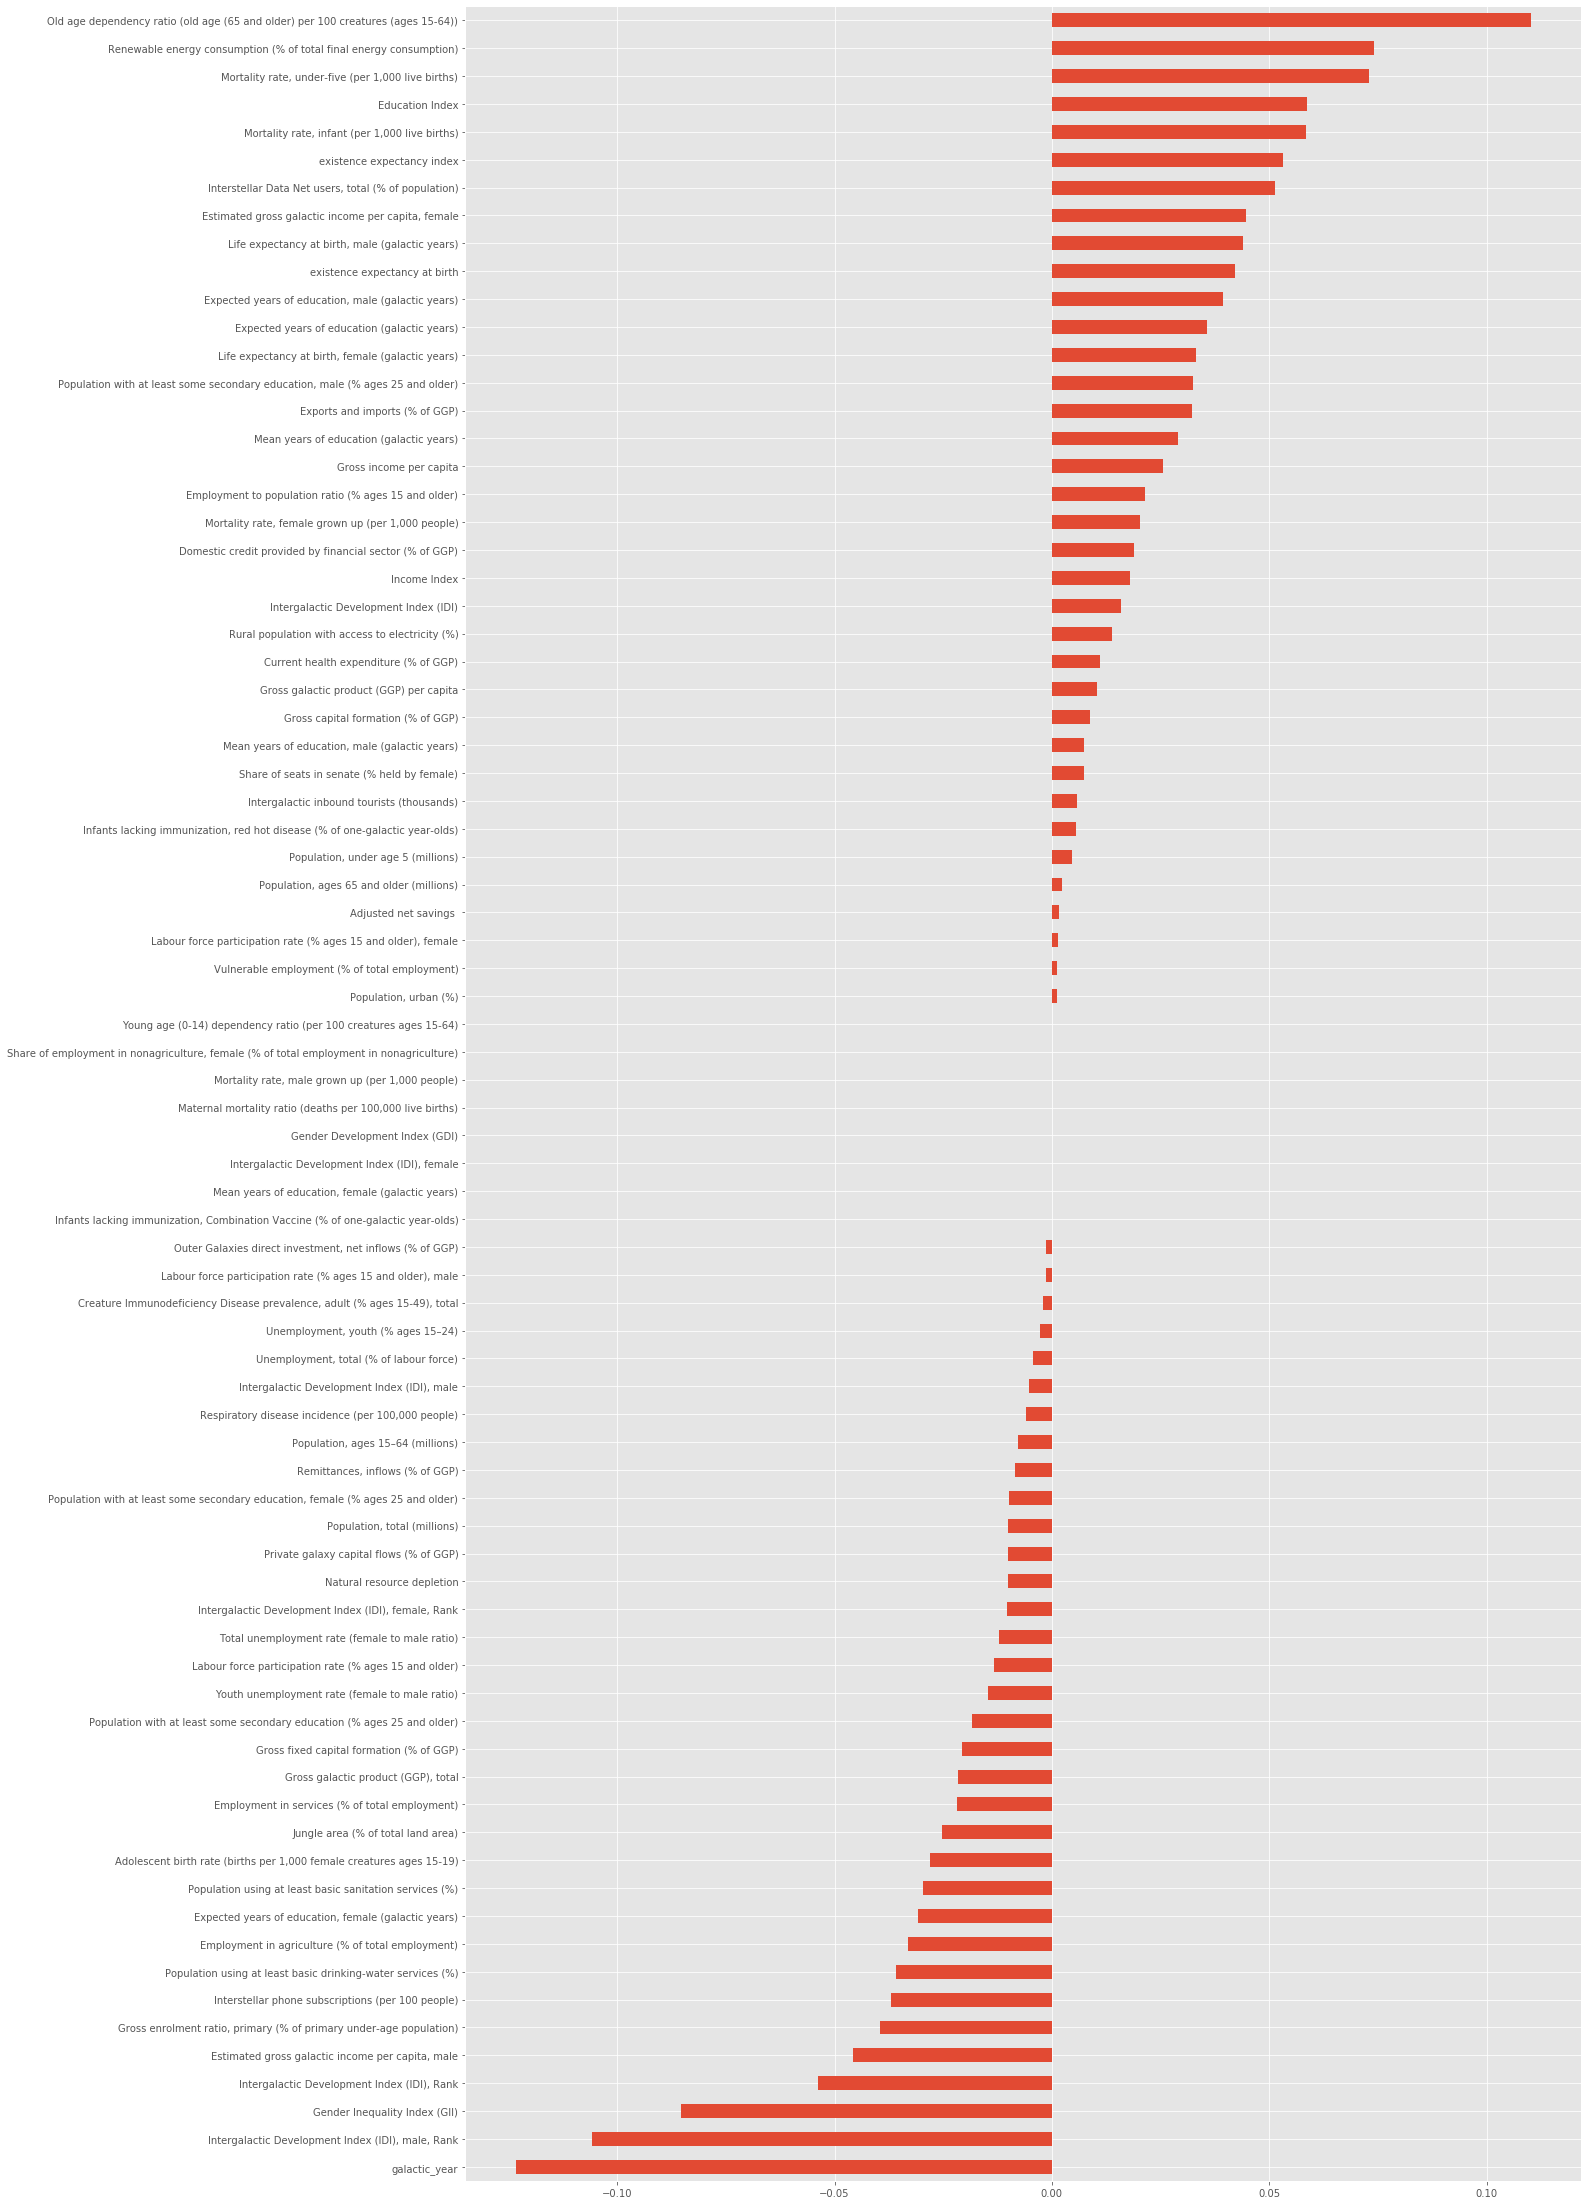

In [277]:
coef_lasso = pd.DataFrame(lassoCV.coef_, index=X_dum_std.columns,
                       columns=['coef_lasso'])
coef_lasso['coef_lasso_abs'] = coef_lasso.coef_lasso.abs()

plt.figure(figsize = (20, 40))
coef_lasso['coef_lasso'].sort_values().plot(kind='barh');

In [278]:
coef_lasso.sort_values(by='coef_lasso_abs')

coef_lasso  coef_lasso_abs
Mortality rate, male grown up (per 1,000 people)     -0.000000        0.000000
Infants lacking immunization, Combination Vacci...   -0.000000        0.000000
Young age (0-14) dependency ratio (per 100 crea...    0.000000        0.000000
Mean years of education, female (galactic years)     -0.000000        0.000000
Maternal mortality ratio (deaths per 100,000 li...    0.000000        0.000000
...                                                        ...             ...
Renewable energy consumption (% of total final ...    0.074036        0.074036
Gender Inequality Index (GII)                        -0.085390        0.085390
Intergalactic Development Index (IDI), male, Rank    -0.105714        0.105714
Old age dependency ratio (old age (65 and older...    0.110142        0.110142
galactic_year                                        -0.123275        0.123275

[78 rows x 2 columns]

In [279]:
coef_thres = np.linspace(coef_lasso.coef_lasso_abs.min(),
                         0.01, num=50)
mean_cv_scores = []
cols_dropped = []
for thres in coef_thres:
    good_coef = coef_lasso[coef_lasso.coef_lasso_abs >= thres].index
    cols_dropped.append(len(X_dum_std.columns) - len(good_coef))

    X_subset = X_dum_std.loc[:, good_coef]

    lassoCV = LassoCV(n_alphas=50, cv=kf)
    lassoCV.fit(X_subset, y)
    lasso = Lasso(alpha=lassoCV.alpha_)
    mean_cv_scores.append(cross_val_score(lasso, X_subset, y, cv = kf, scoring = 'neg_mean_squared_error').mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.397125323201891, tolerance: 0.0985531701379113
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19642337539198707, tolerance: 0.09934107706244925
  positive)


In [280]:
improve_lasso = pd.DataFrame({'coef_thres_lasso': coef_thres, 'mean_cv_scores_lasso': mean_cv_scores, 
                              'cols_dropped_num_lasso': cols_dropped})

In [281]:
improve_lasso = improve_lasso.sort_values(by=['mean_cv_scores_lasso', 'cols_dropped_num_lasso'], 
                                          ascending =[False, False])
improve_lasso[:10]

coef_thres_lasso  mean_cv_scores_lasso  cols_dropped_num_lasso
49          0.010000             -0.069998                      30
43          0.008776             -0.070040                      28
44          0.008980             -0.070040                      28
45          0.009184             -0.070040                      28
46          0.009388             -0.070040                      28
47          0.009592             -0.070040                      28
48          0.009796             -0.070040                      28
42          0.008571             -0.070083                      27
39          0.007959             -0.070096                      26
40          0.008163             -0.070096                      26

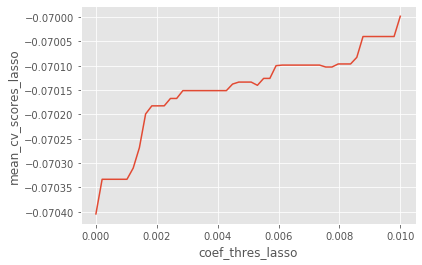

In [282]:
sns.lineplot(improve_lasso.coef_thres_lasso, improve_lasso.mean_cv_scores_lasso)
plt.show()

In [283]:
#Optimal model 
good_coef = coef_lasso[coef_lasso.coef_lasso_abs >= 0.004898].index
cols_dropped.append(len(X_dum_std.columns) - len(good_coef))

X_subset = X_dum_std.loc[:, good_coef]

lassoCV = LassoCV(n_alphas=50, cv=kf)
lassoCV.fit(X_subset, y)
lasso = Lasso(alpha=lassoCV.alpha_)
lasso.fit(X_subset, y)
cross_val_score(lasso, X_subset, y, cv = kf, scoring = 'neg_mean_squared_error').mean()

-0.07013346478703926

We then use the optimal Lasso model to predict using the test set which formed our predictions for submission. 

In [ ]:
#Only keep the columns above 0.01 coefficients
X_test_subset = X_dum_test_std.loc[:, list(X_subset.columns)].copy()

In [285]:
#Predict y_test:
predictions = np.exp(lasso.predict(X_test_subset))

For the optimisation part, we satisfy the minimum constraints set out by the brief and divide 10% of the 50000 DSML units across the galaxies with expectancy index below 0.7 and divide the remaining 90% between the other galaxies. We then saved the predictions and optimal allocations in a csv file for submission.

In [203]:
len(X_test[X_test['existence expectancy index'] < 0.7].index)
print(5000/66)
print((50000-(76*66))/(890-66))

66

In [289]:
pred_reg_df = pd.DataFrame(predictions, columns = ['pred'])
pred_reg_df['opt_pred'] = X_test['existence expectancy index'].map(lambda x: 76 if x < 0.7 else 54)
pred_reg_df = pred_reg_df.reset_index()
pred_reg_df.to_csv('/../../pred_reg_df.csv', header=True, index=False)

In [290]:
pred_reg_df

index      pred  opt_pred
0        0  0.040773        76
1        1  0.035301        76
2        2  0.038071        76
3        3  0.048861        76
4        4  0.043553        76
..     ...       ...       ...
885    885  0.057309        54
886    886  0.057309        54
887    887  0.057309        54
888    888  0.057309        54
889    889  0.057309        54

[890 rows x 3 columns]

#### Ridge Reg

In [36]:
ridgeCV = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=kf)
ridgeCV.fit(X_dum_std, y)

train_score = ridgeCV.score(X_dum_std, y)

#Cross Validation 
ridge = Ridge(alpha=ridgeCV.alpha_)
cv_score = cross_val_score(ridge, X_dum_std, y, cv = kf).mean()

print(f'Model intercept: {ridgeCV.intercept_}')
#print(f'Model coeff: {ridgeCV.coef_}')
print(f'Model alpha: {ridgeCV.alpha_}')
print(f'CV Score: {cv_score}')
print(f'Train Score: {train_score}')

Model intercept: -2.6802860953194028
Model alpha: 0.3593813663804626
CV Score: 0.9575335590246776
Train Score: 0.9660145691078287


#### KNN Regressor - Best model

Out of all the models we tried, the KNN regressor gave us the best predictions, after gridsearching to find the optimal parameters.

In [181]:
knn = KNeighborsRegressor(n_neighbors=3)
#knn.fit(X, y)
knn_cv = -cross_val_score(knn,X_dum_std,y,cv=kf,scoring='neg_mean_squared_error').mean()
knn_cv

0.030322086441593128

In [182]:
#Gridsearching
params = {'n_neighbors': np.arange(3, 11),
          'weights': ['uniform', 'distance'],
          'p': [1,2],
          'leaf_size': np.arange(20, 45, 5)}

gs_knn = GridSearchCV(knn, param_grid=params, cv=kf, n_jobs=2, verbose = 1)
gs_knn.fit(X_dum_std,y)
print(gs_knn.best_score_)
gs_knn.best_estimator_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   20.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  3.1min


0.9070750057546396


[Parallel(n_jobs=2)]: Done 800 out of 800 | elapsed:  3.1min finished


KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [183]:
#Optimal KNNRegressor
knn_opt = gs_knn.best_estimator_
knn_opt.fit(X_dum_std,y)
print(-cross_val_score(knn_opt,X_dum_std,y,cv=kf,scoring='neg_mean_squared_error').mean())

0.02959201558011925


In [79]:
#Optimal KNNRegressor - with the optimal parameters so we don't have to run grisearch again
knn_opt = KNeighborsRegressor(n_neighbors=4,leaf_size=20,weights='distance',p=2)
knn_optt.fit(X_dum_std, y)
print(-cross_val_score(knn_opt,X_dum_std,y,cv=kf,scoring='neg_mean_squared_error').mean())

0.04453019801143533


In [185]:
#Forming the submission csv for predictions from the KNN regressor
pred_knn = np.exp(knn_opt.predict(X_dum_test_std))
pred_knn_df = pd.DataFrame(pred_knn, columns = ['pred'])
pred_knn_df['opt_pred'] = X_test['existence expectancy index'].map(lambda x: 76 if x < 0.7 else 54)
pred_knn_df = pred_knn_df.reset_index()
pred_knn_df.to_csv('/../../pred_knn_df.csv', index=False)

In [186]:
pred_knn_df

index      pred  opt_pred
0        0  0.049198        76
1        1  0.044653        76
2        2  0.042409        76
3        3  0.043340        76
4        4  0.048296        76
..     ...       ...       ...
885    885  0.032499        54
886    886  0.042007        54
887    887  0.065282        54
888    888  0.064422        54
889    889  0.029684        76

[890 rows x 3 columns]

#### Random Forest Regressor

In [176]:
rf = RandomForestRegressor()
print(-cross_val_score(rf,X_dum_std,y,cv=kf,scoring='neg_mean_squared_error').mean())

0.029280962532118038


In [ ]:
params = {'n_neighbors': np.arange(3, 11),
          'weights': ['uniform', 'distance'],
          'p': [1,2],
          'leaf_size': np.arange(20, 45, 5)}

gs_rf = GridSearchCV(rf, param_grid=params, cv=kf, n_jobs=2, verbose = 1)
gs_rf.fit(X_dum_std,y)
print(gs_rf.best_score_)
gs_rf.best_estimator_

In [ ]:
rf_opt = gs_knn.best_estimator_
rf_opt.fit(X_dum_std,y)
print(-cross_val_score(rf_opt,X_dum_std,y,cv=kf,scoring='neg_mean_squared_error').mean())

#### CatBoost Regressor

In [99]:
from catboost import CatBoostRegressor

In [168]:
cat = CatBoostRegressor(iterations =  100,
         depth = 5,
         learning_rate=0.2,
         loss_function ='RMSE',
         l2_leaf_reg=4,
         random_state= 1)
cat.fit(train_1, y)

cat_train_pred = cat.predict(train_1)
sqrt(mean_squared_error(y, cat_train_pred))

0:	learn: 0.5261803	total: 16.1ms	remaining: 1.6s
1:	learn: 0.4933285	total: 24ms	remaining: 1.18s
2:	learn: 0.4621026	total: 36.4ms	remaining: 1.18s
3:	learn: 0.4370994	total: 43.1ms	remaining: 1.03s
4:	learn: 0.4126199	total: 50.4ms	remaining: 958ms
5:	learn: 0.3906931	total: 57.8ms	remaining: 906ms
6:	learn: 0.3710968	total: 64.6ms	remaining: 858ms
7:	learn: 0.3529820	total: 71.1ms	remaining: 817ms
8:	learn: 0.3372330	total: 79.2ms	remaining: 801ms
9:	learn: 0.3226717	total: 86.9ms	remaining: 782ms
10:	learn: 0.3097045	total: 93.5ms	remaining: 757ms
11:	learn: 0.2988450	total: 100ms	remaining: 735ms
12:	learn: 0.2888006	total: 107ms	remaining: 715ms
13:	learn: 0.2813265	total: 115ms	remaining: 705ms
14:	learn: 0.2732674	total: 121ms	remaining: 687ms
15:	learn: 0.2662758	total: 128ms	remaining: 671ms
16:	learn: 0.2595883	total: 134ms	remaining: 656ms
17:	learn: 0.2538357	total: 141ms	remaining: 641ms
18:	learn: 0.2478944	total: 147ms	remaining: 628ms
19:	learn: 0.2423653	total: 154ms

#### Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
nn = MLPRegressor(hidden_layer_sizes =(180,80,120,50,10), 
        activation ='identity', 
        solver ='lbfgs',
        alpha = 0.01, random_state =1)
nn.fit(train_1, y)

nn_train_pred = nn.predict(train_1)
sqrt(mean_squared_error(y, nn_train_pred))

#### Support Vector Machines

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVR(C = 0.05623413251903491, gamma=0.0001, kernel='linear')
svm.fit(train_1, y)
svm_train_pred = svm.predict(train_1)
sqrt(mean_squared_error(y, svm_train_pred))

#### XGBoost

In [ ]:
xgbr= xgb.XGBRegressor()

param_grid={"learning_rate":[0.05,0.01],
            "max_depth": [1,4,6,10,12],
            "n_estimators":[1500,2000],
            "colsample_bytree":[0.1,0.5,0.3,0.6],
           'gamma':[0,0.001]}
            
    
#Create spilts
skf = KFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=xgbr,
                    param_grid=param_grid,
                    scoring='r2',
                    n_jobs=2,
                    cv=skf.split(X, y),
                    verbose=3)
                    
grid.fit(X_dum_std,y)
print('grid search best score: ',grid.best_score_)
print('grid search best params: ',grid.best_params_)
b_param_xgb=xgb.XGBRegressor(**xgb_params)

#Finding the cross validated neg mean squared error
cv_xgb=cross_val_score(b_param_xgb,X_dum_std,y,cv=5,scoring='neg_mean_squared_error')
b_param_xgb.fit(X_dum_std,y)

#finding predictions for test set
preds=b_param_xgb.predict(X_test_std)
preds=np.exp(preds)

#### Stacking

We also tried stacking models to improve our MSE score using a custom class, defined in the script `stacked_models.py`: 
- First layer: KNNRegressor, Lasso, XGBoost 
- Second layer: XGBoost

In [ ]:
#intiliase models for stacking
knn_stacked = KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

lasso = Lasso(alpha = 0.0005336699231206312)
xgb_b_param_xgb=xgb.XGBRegressor(**xgb_params)
model_list=[knn_stacked,lasso,xgb_b_param_xgb]
stacked_mod=stacked_model_reg(model_list,knn_stacked,allow_passthrough=False)
stacked_mod.first_layer_predict(X_dum_std,X_test_std, y)
stacked_mod.second_layer_fit(X_dum_std)
stacked_mod.cv_score(X_train=None,y_train=y)
preds=stacked_mod.predict('test')
preds=np.exp(preds)

### Optimisation problem

In [288]:
#Read in the current best submission file
pred_knn_df = pd.read_csv('/../../pred_knn_df.csv')
pred_knn_df

index      pred  opt_pred
0        0  0.049198       100
1        1  0.044653       100
2        2  0.042409       100
3        3  0.043340       100
4        4  0.048296       100
..     ...       ...       ...
885    885  0.032499       100
886    886  0.042007       100
887    887  0.065282         0
888    888  0.064422         0
889    889  0.029684       100

[890 rows x 3 columns]

According to the brief, in order to achieve the highest level of well-being through optimal allocation of the 50000 zillion DSML units from the star and satisfy the agreements between galaxies, we have to satisfy the following: 

- no one galaxy will consume more than 100 zillion DSML and no galaxy should have below 0 zillion DSML units allocated
- at least 10% of the total energy will be consumed by galaxies in need with existence expectancy index below 0,7.

Every galaxy has a certain limited potential for improvement in the Index (our target variable) described by the following function:

- Potential for increase in the Index = -np.log(Index+0.01)+3

Likely index increase dependent on potential for improvement and on extra energy availability is described by the following function:

- Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

Our aim is to maximise the likely increase in the index. 

Given that the likely increase in Index for every galaxy is just a constant multiplied by the extra energy we are trying to allocate and that the potential for increase in the Index for each galaxy appears to be inversely proportionl to the expectancy index, we order the galaxies by the Index (our predicted variable) and allocate the first 500 galaxies, 100 zillion DSML units, with the remaining getting 0. 

All of the galaxies with an expectancy index below 0.7 are also in the 500 galaxies so this satisfies all of the constraints, while giving all the galaxies with the highest potential for increase in the Index the maximum they can recieve.

In [264]:
pred_knn_df['expectancy_index'] = df_impt_test['existence expectancy index']
pred_knn_df['potential_inc'] = -np.log(pred_knn_df.pred+0.01)+3

In [265]:
pred_knn_df

index      pred  opt_pred  expectancy_index  potential_inc
0        0  0.049312         0          0.456086       5.824938
1        1  0.045352         0          0.529835       5.894049
2        2  0.042588         0          0.560976       5.945264
3        3  0.042617         0          0.565910       5.944710
4        4  0.048544         0          0.588274       5.837974
..     ...       ...       ...               ...            ...
885    885  0.027881         0          0.859797       6.273297
886    886  0.038039         0          0.912304       6.035739
887    887  0.061059         0          1.090993       5.644252
888    888  0.067889         0          1.005144       5.552467
889    889  0.029198         0          0.678597       6.239128

[890 rows x 5 columns]

Current max: 1732.7852777819774 (ordered by predicted wellbeing, first 500 rows = 100 and remaining rows = 0)

In [266]:
pred_knn_df = pred_knn_df.sort_values(by='pred')
pred_knn_df.iloc[0:500, 2] = 100
pred_knn_df.iloc[500:, 2] = 0
pred_knn_df['likely_inc'] = pred_knn_df.opt_pred*(pred_knn_df.potential_inc**2)/1000
print(pred_knn_df.opt_pred.sum())
pred_knn_df.likely_inc.sum()

50000


1738.5480899516301

In [267]:
pred_knn_df.opt_pred.sum()

50000

In [268]:
pred_knn_df.head()

index      pred  opt_pred  expectancy_index  potential_inc  likely_inc
49      49  0.016447       100          0.671839       6.632616    4.399159
76      76  0.021089       100          0.720587       6.470917    4.187276
141    141  0.021089       100          0.778298       6.470917    4.187276
138    138  0.021089       100          0.775467       6.470917    4.187276
84      84  0.021089       100          0.730208       6.470917    4.187276

In [269]:
pred_knn_df.opt_pred.value_counts()

100    500
0      390
Name: opt_pred, dtype: int64

In [224]:
pred_knn_df.opt_pred.sum()

50000

In [270]:
pred_knn_df[(pred_knn_df.expectancy_index < 0.70)&(pred_knn_df.opt_pred == 0)]

Empty DataFrame
Columns: [index, pred, opt_pred, expectancy_index, potential_inc, likely_inc]
Index: []

In [271]:
#Saving the results in the format required to a csv
pred_knn_df = pred_knn_df.sort_values(by='index')
pred_knn_df[['index', 'pred', 'opt_pred']].to_csv('/../../pred_knn_df.csv', header=True, index=False)

In [272]:
pred_knn_df

index      pred  opt_pred  expectancy_index  potential_inc  likely_inc
0        0  0.049312       100          0.456086       5.824938    3.392990
1        1  0.045352       100          0.529835       5.894049    3.473981
2        2  0.042588       100          0.560976       5.945264    3.534617
3        3  0.042617       100          0.565910       5.944710    3.533958
4        4  0.048544       100          0.588274       5.837974    3.408194
..     ...       ...       ...               ...            ...         ...
885    885  0.027881       100          0.859797       6.273297    3.935426
886    886  0.038039       100          0.912304       6.035739    3.643014
887    887  0.061059         0          1.090993       5.644252    0.000000
888    888  0.067889         0          1.005144       5.552467    0.000000
889    889  0.029198       100          0.678597       6.239128    3.892671

[890 rows x 6 columns]